Florian Quintin
Project 1

Vous êtes nouvel embauche chez CoolCorp, une startup qui spécialise dans l'analyse des désastres maritimes.
Un nouveau client, White Star Lines, se trouve face à un procès à travers le temps, affaire délicat.
Votre chef vous demande, en tant que seul data scientist chez CoolCorp, d'analyser les données `*.csv`.
WSL a déjà engagé un expert pour annoter une partie des données (`test.csv`) avec la survie ou pas des passagers.

In [3]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import math as mt
%matplotlib inline
import csv as csv

In [4]:
df = pd.read_csv('train.csv', header=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pour rappel :

    PassengerId : Le numéro d'embarquement du passager
    Survived : Indique si le passager a survécu (1) ou non (0)
    Pclass : La classe dans laquelle le passager était enregistré, 1, 2 ou 3.
    Name : Nom du passager
    Sex : Sexe du passager
    Age : Age du passager
    SibSp : Nombre de frères, soeurs épouse/époux du passager
    Parch : Nombre de pères/mères
    Ticket : Numéro du ticketdu passager
    Fare : Prix du ticker du passager
    Cabin : Numéro de cabine
    Embarked : Lieu d'embarcation


Nous alons meintenante nous intéreser à la colone Embarked qui se traduit par : C = Cherbourg; Q = Queenstown; S = Southampton

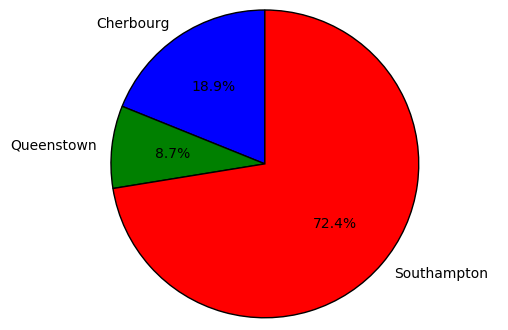

('le nombre total de passager embarque est', 889)


In [65]:
# Calcule du nombre de passager suivante le lieux d'emparquement

Cherbourg = df["Embarked"] == "C"
Queenstown = df["Embarked"] == "Q"
Southampton = df["Embarked"] == "S"

NbEmbarkedC = len(df[Cherbourg])
NbEmbarkedQ = len(df[Queenstown])
NbEmbarkedS = len(df[Southampton])

listData = [NbEmbarkedC, NbEmbarkedQ, NbEmbarkedS]
name = ['Cherbourg', 'Queenstown', 'Southampton']


plt.pie(listData, labels=name, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


print("le nombre total de passager embarque est", NbEmbarkedC + NbQueenstownC + NbSouthamptonC)

On peux constater que une grand majoriter des passageés on embarqué à Southampton selà peux s'expliquer par le fait que le Titanic à commencer ça croisier dans son port, puis a embarquer de nouveau passager à Cherbourg et termine par Queenstown avant de commancer la trance Atlentique.

Nous alons meintenant nous interresser au personne qui on suvécu ou celle-si on embarquer

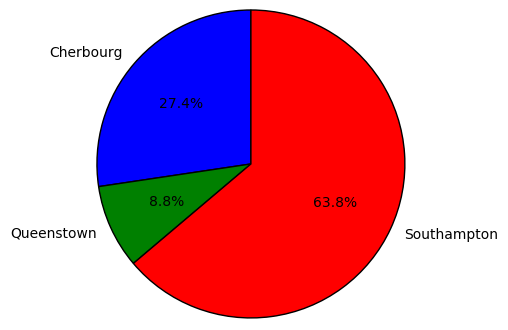

In [67]:
PassageSurvived = df["Survived"] == 1

Cherbourg = df["Embarked"] == "C"
Queenstown = df["Embarked"] == "Q"
Southampton = df["Embarked"] == "S"

NbSurvivedC = len(df[ PassageSurvived & Cherbourg ])
NbSurvivedQ = len(df[ PassageSurvived & Queenstown ])
NbSurvivedS = len(df[ PassageSurvived & Southampton ])

listData = [NbSurvivedC, NbSurvivedQ, NbSurvivedS]
name = ['Cherbourg', 'Queenstown', 'Southampton']


plt.pie(listData, labels=name, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


<Container object of 3 artists>

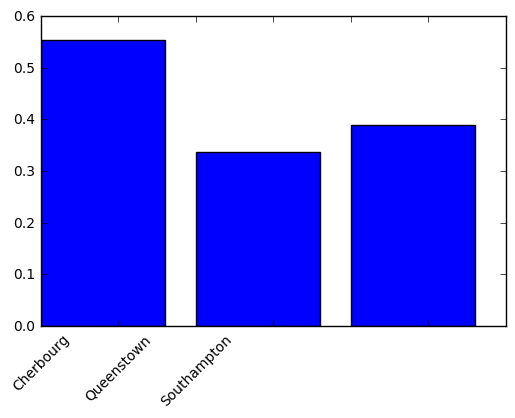

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)

PassageSurvived = df["Survived"] == 1

Cherbourg = df["Embarked"] == "C"
Queenstown = df["Embarked"] == "Q"
Southampton = df["Embarked"] == "S"

NbEmbarkedC = len(df[Cherbourg])
NbEmbarkedQ = len(df[Queenstown])
NbEmbarkedS = len(df[Southampton])

NbSurvivedC = len(df[ PassageSurvived & Cherbourg ])
NbSurvivedQ = len(df[ PassageSurvived & Queenstown ])
NbSurvivedS = len(df[ PassageSurvived & Southampton ])

RaportC = float(NbSurvivedC) / float(NbEmbarkedC)
RaportS = float(NbSurvivedS) / float(NbEmbarkedS)
RaportQ = float(NbSurvivedQ) / float(NbEmbarkedQ)

listData = [RaportC, RaportS, RaportQ]
name = ['Cherbourg', 'Queenstown', 'Southampton']
xtickNames = ax.set_xticklabels(xTickMarks)


plt.setp(xtickNames, rotation=45, fontsize=10)
ax.bar(range(len(listData)), listData)


In [87]:
plt.setp?